 ![Biodiversity in National Parks Image](Biodiversity_National_Parks.png "Biodiversity in National Parks")

# Introduction

The aim of this project is to explore the dataset and analyze endangered species in U.S.A. national parks, identifying similarities and patterns, and acquire an understanding about the number and scope of endangered species in those parks. Through this analysis, I aim to enhance understanding of endangered species,contribute to survival of at-risk species, and support the parks to maintain their biodiversity.
<br>The project consists of loading a dataset that was available through the Codecademy platform, and I'll be running summary statistics on that data, making correlations, and looking at relationships between species, parks, and each-other, to get insights about the species and the parks.

# Goals

In this project I'll be using data from the National Parks Service about endangered animal species in different national parks. I'll be looking for any patterns or themes in the types of species that become endangered and answering some questions about those species and the parks, such as:
* What is the distribution of the species that become endangered?
* Are certain species more likely to become endangered?
* Which are the parks with the least and the most endangered species?
* Is there a class (mammals, birds, etc.) with more endangered species, and is it the same across all parks?

# Data

The data provided for this project is made available through the [Codecademy's]((https://www.codecademy.com) platform and consists of two files: `species_info.csv` has information about the animals' species, and `observations.csv` has observation of species with parks locations.

# Analysis

On the project I'll be using descriptive statistics and data visualization techniques to understand and analyze the data, and using statistical inference to understand if our values are significant.
<br>Key metrics include:
* Summary statistics
* Distributions
* Correlations and relationships

### Initializing the libraries that are being used and importing the datasets

In [1]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Datasets
species = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')

# Printing the first five rows of our Datasets to confirm everything is OK
display('Species:\n',species.head())
display('\nObservations:\n',obs.head())

'Species:\n'

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


'\nObservations:\n'

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Confirming integrety of data and overview of general shape

In [2]:
display('Species shape: ',np.shape(species))
display(species.columns)
display(species.describe())

display('\nObservations shape: ',np.shape(obs))
display(obs.columns)
display(obs.describe(include = 'all'))


'Species shape: '

(5824, 4)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Procyon lotor,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


'\nObservations shape: '

(23296, 3)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Puma concolor,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


The `Species` DataFrame has 5824 rows and 4 columns. The columns are `category`, which contains the class of the animal, `scientific_name` and `common_names`, which are self-explainatory, and `conservation_status`, containing each species' conservation status. There are seven categories of animals, and there are 4 conservation status, which we'll investigate next. It can also be observed that the `conservation_status` is the only column in both our DataFrames that has `NULL` values, containing (5824-191) 5633 empty values.

The `Observations` DataFrame has 23296 rows and 3 columns, named `scientific_name`, with the animal's scientific name, `park_name`, containing the park where the observation was made, and `observations`, with a count of how many times that species was observed at that park. There are 5541 different animals observed and our data comes from 4 national parks.

In [3]:
display('Animal Classes:',species['category'].unique())
display('Conservation Status:', species['conservation_status'].unique())
display('Parks: ', obs['park_name'].unique())

'Animal Classes:'

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

'Conservation Status:'

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

'Parks: '

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

Above we can see the values that make up the `category`, `conservation_status`and `park_name` columns. The `conservation_status` column presents an empty value for species that are not endangered, so, instead of having the value `NaN`, the empty cells will be replaced with the string `Least Concern`

In [4]:
species = species.fillna(value='Least Concern')

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,"American Bison, Bison",Least Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern


### Visualizations

Now we can interpret the data with some visualizations.

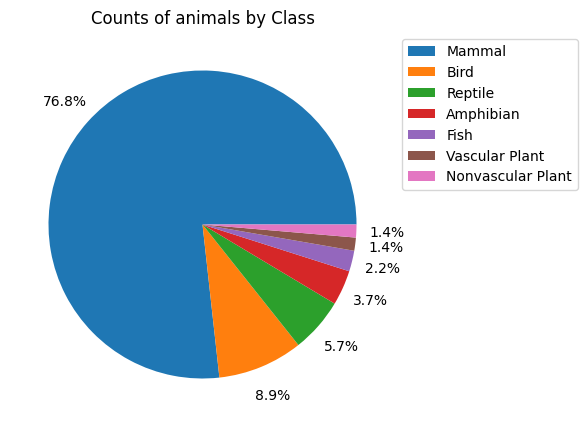

In [5]:
plt.figure(figsize = (9,5))
plt.title('Counts of animals by Class')
plt.pie(x = species['category'].value_counts(), autopct = '%.1f%%', pctdistance =1.2)
plt.legend(labels = species['category'].unique(), bbox_to_anchor = (1,1))
plt.show()

It seems most entries in our database are mammals, making up more than three third of the records. the next two biggest groups are birds with 8.99999% and reptiles with 5.7%.

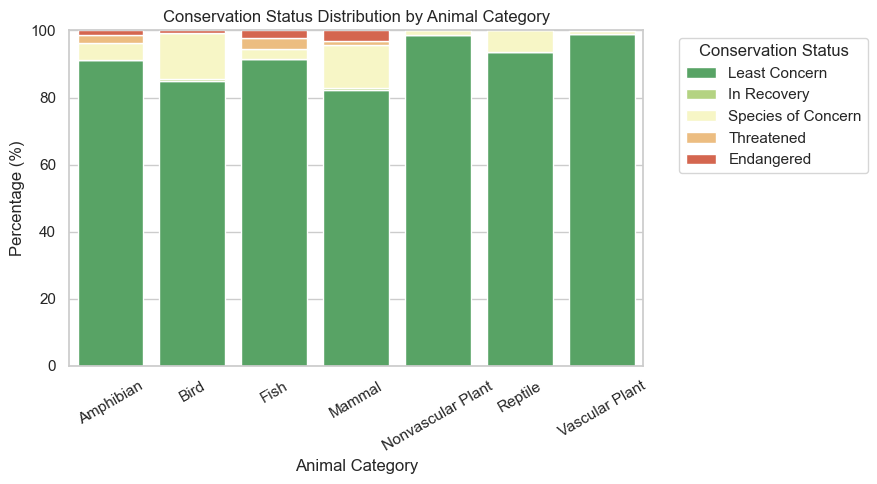

In [6]:
# Defining desired order of conservation statuses
status_order = ['Least Concern', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered']

# Creating a normalized crosstab
ct = pd.crosstab(species['category'], species['conservation_status'], normalize='index') * 100

# Keep only statuses present in data, and sort by the custom order
ct = ct[[col for col in status_order if col in ct.columns]]

# Melt to long format for Seaborn
ct = ct.reset_index().melt(id_vars='category', var_name='conservation_status', value_name='percentage')

# Plot stacked bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))

bottoms = pd.Series(0.0, index=ct['category'].unique())

# Use Seaborn color palette (light-to-dark gradient)
palette = sns.color_palette("RdYlGn_r", n_colors=len(ct['conservation_status'].unique()))

for status, color in zip(ct['conservation_status'].unique(), palette):
    subset = ct[ct['conservation_status'] == status]
    sns.barplot(x='category', y='percentage', data=subset, label=status, color=color, bottom=bottoms.loc[subset['category']].values)
    bottoms[subset['category']] += subset['percentage'].values

plt.ylabel('Percentage (%)')
plt.xlabel('Animal Category')
plt.tick_params(axis = 'x', labelrotation = 30)
plt.title('Conservation Status Distribution by Animal Category')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The above image shows us that the class with most `Endangered` specimens is `Mammal`, followed by `Fish`. Fish have more `Threatened`species, followed by `Anphibian`.

In [7]:
# Adding a column to obs with the conservation status, so we can check the spread of conservation status on all parks
obs = obs.merge(species[['scientific_name', 'conservation_status']], on='scientific_name', how='left')

# Confirming our changes took effect
display(obs.head())

,scientific_name,park_name,observations,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Least Concern
2,Prunus subcordata,Yosemite National Park,138,Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Least Concern


conservation_status,In Recovery,Species of Concern,Threatened,Endangered
park_name,,,,
Bryce National Park,0.093633,2.855805,0.17166,0.31211
Great Smoky Mountains National Park,0.093633,2.855805,0.17166,0.31211
Yellowstone National Park,0.093633,2.855805,0.17166,0.31211
Yosemite National Park,0.093633,2.855805,0.17166,0.31211


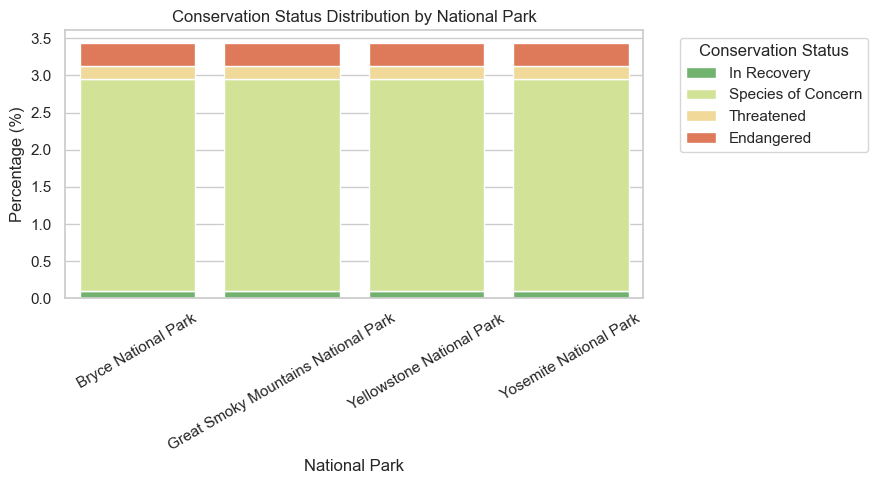

In [8]:
# Defining desired order of conservation statuses while ignoring 'Least Concern' as the percentage of those species would be to big making other
# values hard to see on plot
status_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']

# Creating a normalized crosstab
ct = pd.crosstab(obs['park_name'], obs['conservation_status'], normalize='index') * 100

# Keep only statuses present in data, and sort by the custom order
ct = ct[[col for col in status_order if col in ct.columns]]
display(ct)

# Melt to long format for Seaborn
ct = ct.reset_index().melt(id_vars='park_name', var_name='conservation_status', value_name='percentage')

# Plot stacked bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))

bottoms = pd.Series(0.0, index=ct['park_name'].unique())

# Use Seaborn color palette (light-to-dark gradient)
palette = sns.color_palette("RdYlGn_r", n_colors=len(ct['conservation_status'].unique()))

for status, color in zip(ct['conservation_status'].unique(), palette):
    subset = ct[ct['conservation_status'] == status]
    sns.barplot(x='park_name', y='percentage', data=subset, label=status, color=color, bottom=bottoms.loc[subset['park_name']].values)
    bottoms[subset['park_name']] += subset['percentage'].values

plt.ylabel('Percentage (%)')
plt.xlabel('National Park')
plt.tick_params(axis = 'x', labelrotation = 30)
plt.title('Conservation Status Distribution by National Park')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

It seems that all parks have the same number of endanegred and threatened species, this is possibly due to all species that fit that criteria being seen in the four parks.

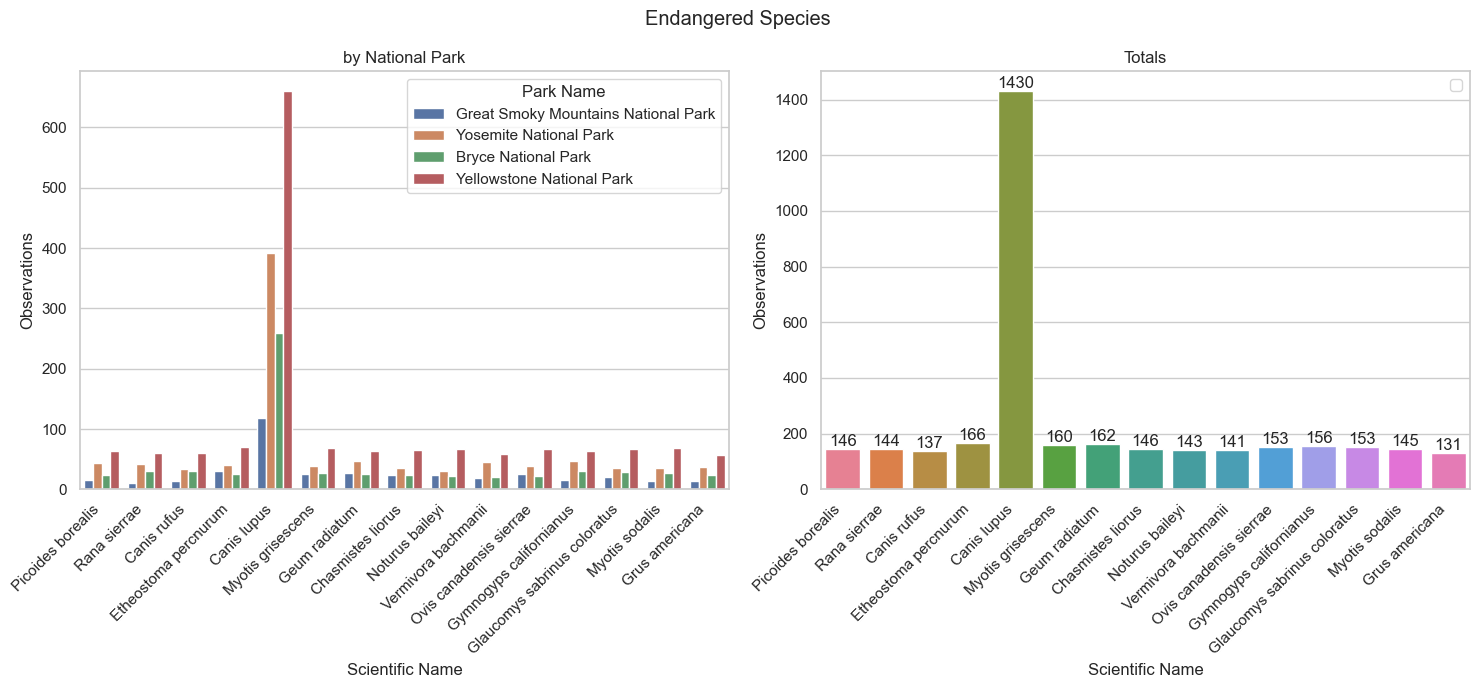

In [9]:
plt.figure(figsize=(15,7))
plt.suptitle('Endangered Species')

plt.subplot(1,2,1)
plt.title('by National Park')
sns.barplot(x = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], y = obs['observations'], estimator = 'sum', 
            hue = obs['park_name'], errorbar = None)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Observations')
plt.xlabel('Scientific Name')
plt.legend(title = 'Park Name')

plt.subplot(1,2,2)
plt.title('Totals')
ax = sns.barplot(x = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], y = obs['observations'], estimator = 'sum',
            hue = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], errorbar = None)
plt.xticks(rotation = 45, ha = 'right')
# Adding the count on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Observations')
plt.xlabel('Scientific Name')
plt.legend(labels = '')

plt.tight_layout()
plt.show()

So, we can see that from the 15 species currently labeled as `Endangered`, Canis Lupus is the one that was observed the most, vastly surpassing the number of observations of any other species. The Grus americana is the endangered species that was observed the least with only 131 observations across all parks.

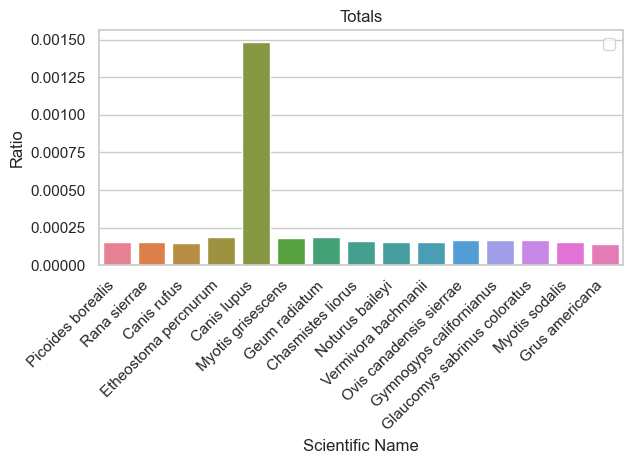

In [15]:
# Compute total observations per park
park_totals = obs.groupby('park_name')['observations'].transform('sum')

# Ratio of each row's observations to its park total
obs['ratio'] = obs['observations'] / park_totals

plt.title('Totals')
ax = sns.barplot(x = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], y = obs['ratio'], estimator = 'sum',
            hue = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], errorbar = None)
plt.xticks(rotation = 45, ha = 'right')
# Adding the count on top of the bars
#for container in ax.containers:
#    ax.bar_label(container)
plt.ylabel('Ratio')
plt.xlabel('Scientific Name')
plt.legend(labels = '')

plt.tight_layout()
plt.show()